In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning.

In [49]:
df = pd.read_csv("D:\\COLLEGE\\DAIICT\\Machine Learning\\Assignments\\lab05\\train.csv")

In [50]:
df.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       3104
Churn Reason                         3104
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                         886
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [51]:
df

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,NaN,NaN,52,Long Beach,4590,Month-to-Month,United States,...,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,NaN,NaN,34,San Francisco,5602,One Year,United States,...,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,NaN,NaN,63,Olivehurst,4458,One Year,United States,...,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,NaN,NaN,38,Westlake Village,4115,Month-to-Month,United States,...,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


In [52]:
df.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Churn Category                        object
Churn Reason                          object
Churn Score                            int64
City                                  object
CLTV                                   int64
Contract                              object
Country                               object
Customer ID                           object
Customer Status                       object
Dependents                             int64
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Lat Long                              object
Latitude                             float64
Longitude                            float64
Married                                int64
Monthly Charge                       float64
Multiple L

We are dropping the churn Category and churn Reason column because they have more than 60% missing values and offer column is a object datatype .So, I fill the missing value with no offer . 

In [53]:
df.drop(['Churn Category' , 'Churn Reason'] , axis = 1 , inplace=True)


In [54]:
df['Offer'] = df['Offer'].fillna('No offer')

In [55]:
df.isnull().sum()

Age                                    0
Avg Monthly GB Download                0
Avg Monthly Long Distance Charges      0
Churn Score                            0
City                                   0
CLTV                                   0
Contract                               0
Country                                0
Customer ID                            0
Customer Status                        0
Dependents                             0
Device Protection Plan                 0
Gender                                 0
Internet Service                       0
Internet Type                        886
Lat Long                               0
Latitude                               0
Longitude                              0
Married                                0
Monthly Charge                         0
Multiple Lines                         0
Number of Dependents                   0
Number of Referrals                    0
Offer                                  0
Online Backup   

In [56]:
df['Internet Type'].value_counts()


Internet Type
Fiber Optic    1829
DSL            1008
Cable           502
Name: count, dtype: int64

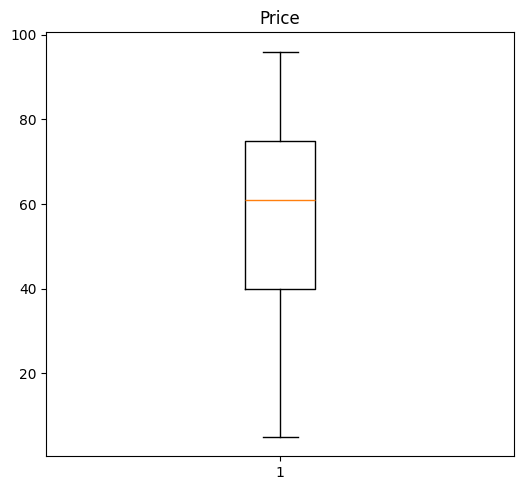

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(df['Churn Score'].dropna())
plt.title("Price")

plt.tight_layout()
plt.show()

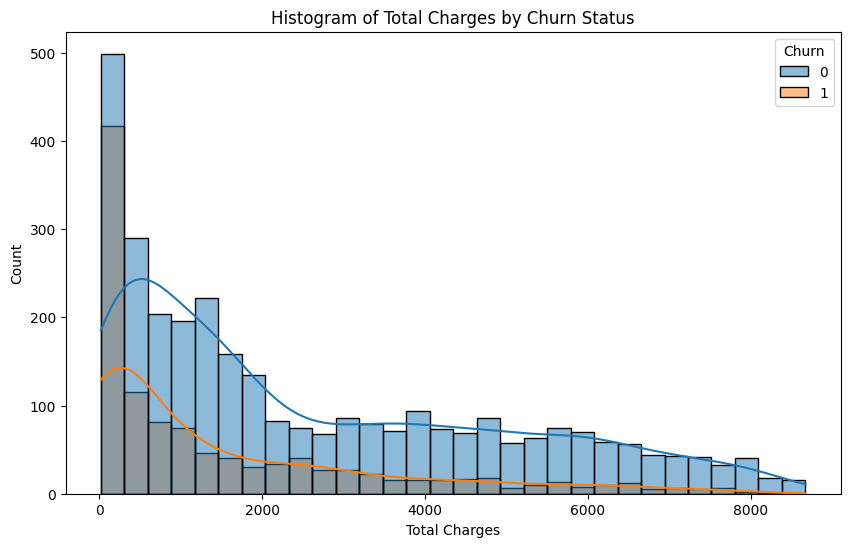

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Total Charges", hue="Churn", bins=30, kde=True, alpha=0.5)
plt.title("Histogram of Total Charges by Churn Status")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()

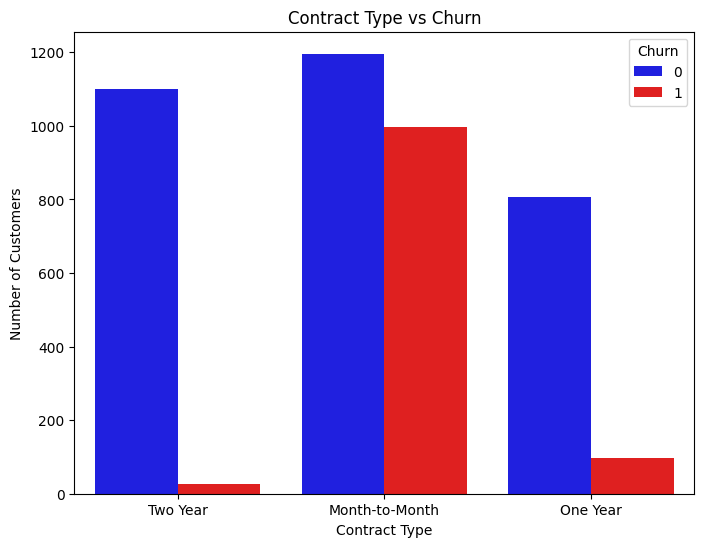

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Contract", hue="Churn", palette={0:"blue", 1:"red"})
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

Summarize your key findings from the EDA in a markdown cell.

1. Churn rate is very high on Month-to-Month Contract type compare to Two or One year Contract . 
2. Company has to focus on new customers who give it a try to month-to-month contract to experience the service . Once they improve in this thing than automatically chrun rate will be reduce because long term contracts have very less churn rate .

Task 2: Feature Engineering 

In [60]:
df['AverageMonthlyRevenue'] = df['Total Charges'] / (df['Tenure in Months'].replace(0, 1))


This feature normalizes revenue over time, highlighting customers who pay more per month consistently.

In [61]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'City', 'CLTV', 'Contract', 'Country', 'Customer ID',
       'Customer Status', 'Dependents', 'Device Protection Plan', 'Gender',
       'Internet Service', 'Internet Type', 'Lat Long', 'Latitude',
       'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code', 'Churn',
       'AverageMonthlyRevenue'],
      dtype='object')

In [62]:
service_cols = [
    'Phone Service', 'Internet Service', 'Online Security', 
    'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies' , 'Streaming Music'
]

# Count how many services a customer has
df['ServiceCount'] = df[service_cols].apply(lambda row: sum(row != 'No'), axis=1)


This categorical column it easier for the model to learn patterns between engagement and churn.

In [63]:
df['ServiceCount'].value_counts()   

ServiceCount
9    4225
Name: count, dtype: int64

In [64]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'City', 'CLTV', 'Contract', 'Country', 'Customer ID',
       'Customer Status', 'Dependents', 'Device Protection Plan', 'Gender',
       'Internet Service', 'Internet Type', 'Lat Long', 'Latitude',
       'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code', 'Churn',
       'AverageMonthlyRevenue', 'ServiceCount'],
      dtype='obj

In [65]:
leakage_cols = [
    'Churn', 'Churn Score', 'Customer Status', 
    'Customer ID', 'CLTV', 'Total Refunds', 
    'Total Revenue', 'AverageMonthlyRevenue', 
    'Lat Long', 'Latitude', 'Longitude', 'Zip Code'
]

X = df.drop(columns=leakage_cols)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [66]:
# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Drop irrelevant columns (example: customerID, if it exists)
irrelevant_cols = ['customerID']
numeric_features = [col for col in numeric_features if col not in irrelevant_cols]
categorical_features = [col for col in categorical_features if col not in irrelevant_cols]


In [67]:
from sklearn.pipeline import make_pipeline

# Numeric preprocessing: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing: impute missing with most_frequent, then OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'   # drop irrelevant cols
)


In [68]:
# Combine preprocessor + classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [69]:
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9644970414201184

Confusion Matrix:
 [[611  10]
 [ 20 204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       621
           1       0.95      0.91      0.93       224

    accuracy                           0.96       845
   macro avg       0.96      0.95      0.95       845
weighted avg       0.96      0.96      0.96       845



In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': ['balanced'] 
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Step 4: Fit model
grid_search.fit(X_train, y_train)

# Step 5: Best params + performance
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best Score: 0.9415815723591712


With EMbalance

In [73]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)

print("=== Model with SMOTE Oversampling ===")
print(classification_report(y_test, y_pred_smote))


=== Model with SMOTE Oversampling ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       621
           1       0.97      0.87      0.92       224

    accuracy                           0.96       845
   macro avg       0.96      0.93      0.94       845
weighted avg       0.96      0.96      0.96       845



Without Embalance

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Baseline pipeline (no imbalance handling)
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

baseline_pipeline.fit(X_train, y_train)
y_pred_base = baseline_pipeline.predict(X_test)

print("=== Baseline Model (No Imbalance Handling) ===")
print(classification_report(y_test, y_pred_base))


=== Baseline Model (No Imbalance Handling) ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       621
           1       0.99      0.83      0.90       224

    accuracy                           0.95       845
   macro avg       0.97      0.91      0.93       845
weighted avg       0.95      0.95      0.95       845



Recall for churners (class 1) improved from 0.83 → 0.87 with SMOTE.
This means the model now detects more actual churners.

Precision for churners dropped slightly (0.99 → 0.97) but is still excellent.

F1-score for churners improved (0.90 → 0.92), showing better balance between precision & recall.

Overall weighted F1 and accuracy improved a little (0.95 → 0.96).

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       621
           1       0.97      0.87      0.92       224

    accuracy                           0.96       845
   macro avg       0.96      0.93      0.94       845
weighted avg       0.96      0.96      0.96       845

ROC AUC Score: 0.9801084080975385


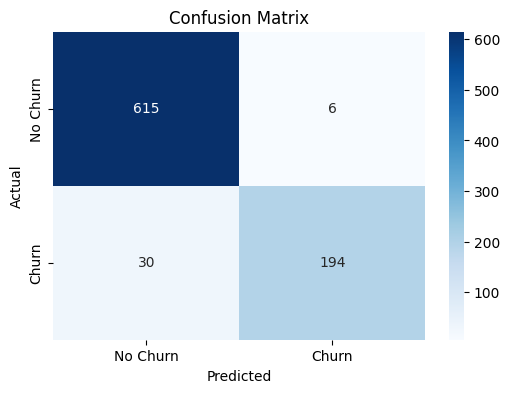

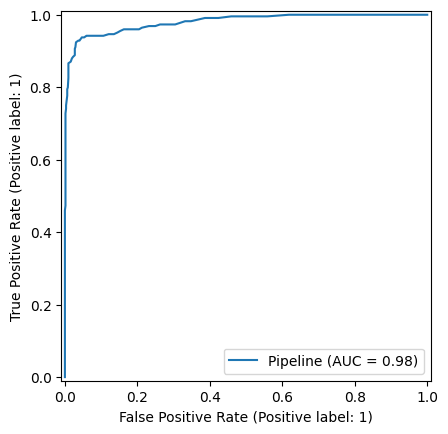

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on test set
y_pred = smote_pipeline.predict(X_test)
y_proba = smote_pipeline.predict_proba(X_test)[:, 1]  # probability for ROC-AUC

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(smote_pipeline, X_test, y_test)
plt.show()


False Negatives are generally worse in churn prediction because losing a customer is more expensive than mistakenly offering retention benefits to a loyal one. Many studies show that acquiring a new customer costs 5–7 times more than retaining an existing one.

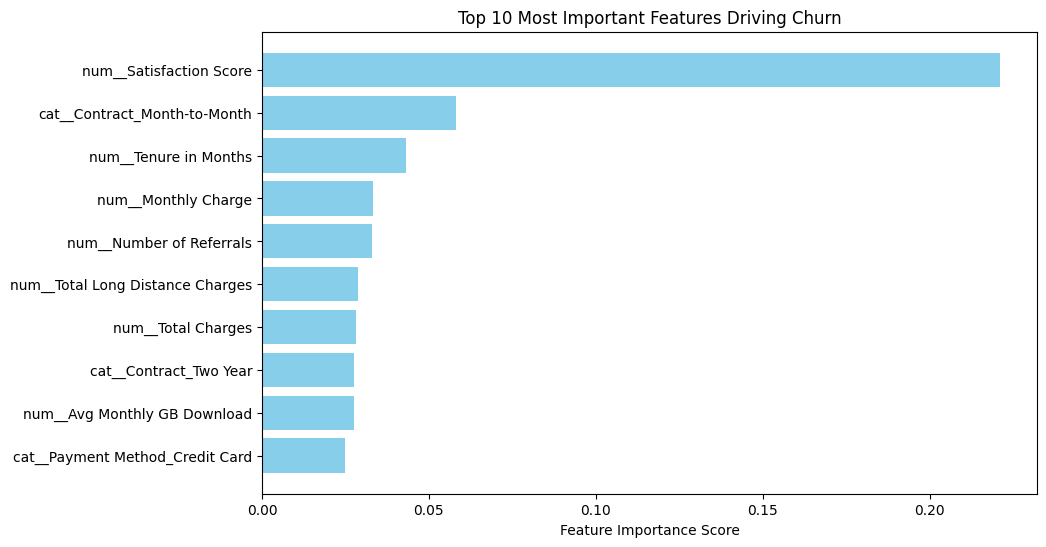

In [78]:
importances = smote_pipeline.named_steps['classifier'].feature_importances_
feature_names = smote_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features Driving Churn")
plt.xlabel("Feature Importance Score")
plt.show()